In [2]:
import numpy as np
from numpy.linalg import inv
from numpy import linalg as LA
import matplotlib.pyplot as plt
import proyecciones as pro
import time

# Davis_Yin

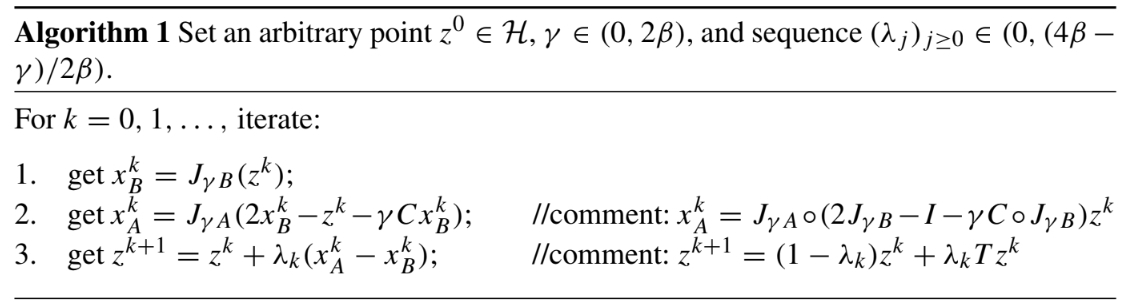

Nuestro objetivo será implementar el algoritmo de davis-yin c:

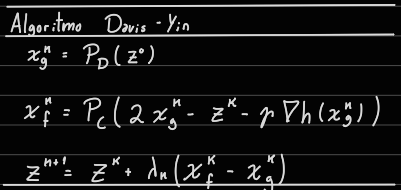

In [3]:
def Davis_Yin_iteration(z1 : np.array, z2: np.array, z3: np.array, gradient_of_h, gamma, lambda_k):
    """
        Input:
            - z1: np.array(1xN)   decision variable
            - z2: np.array(NxM) decision variable
            - z3: np.array(Mx1)   decision variable
            - gradient_of_h: function has contain the gradien of the cost function
            - lambda_k: number between 0 and (4*beta - gamma)/(2*beta) where beta is 
                        the lipschitz constan of the gradien of h.
        Output:
            - tuple np.array, np.array, np.array
        Work:
            The function ompute one iteration over the Davis_Yin_algorithm
            with prior knowledge of gamma.
    """
    
    xg_1, xg_2 = pro.P_D(z1, z2)
    xg_3 = z3
    
    grad_x1, grad_x2, grad_x3 = gradient_of_h#(xg_1, xg_2, z3)
    
    xf_1       = 2*xg_1 - z1 - gamma*grad_x1
    xf_2, xf_3 = pro.P_C(2*xg_2 - z2 - gamma*grad_x2, 2*z3   - z3 - gamma*grad_x3) 
    
    #lambda_k = some formula? 
    
    z_1 = z1 + lambda_k*(xf_1 - xg_1)
    z_2 = z2 + lambda_k*(xf_2 - xg_2)
    z_3 = z3 + lambda_k*(xf_3 - xg_3)
    
    return (xg_1, xg_2, xg_3), (xf_1, xf_2, xf_3), (z_1, z_2, z_3)

In [4]:
x1 = np.array([[1], [2], [1]])
x2 = np.array([[-1, 2, 4, 1, 5],[2, 2, 5, 2, 6],[1, 3, 6, 3, 7]])
x3 = np.array([[2, 4, 1, 6, -1]])

gradient_of_h = np.array([[1], [0.5], [1]]),\
                np.array([[1, 3, 1.5, 4, 5],[0.5, 4, 2, 4, 0],[2, 5, 1, 1, 1]]),\
                np.array([1, 0.5, 2, 2, 3])
        
gamma = 1
lambda_k = 0.1

#%timeit Davis_Yin_iteration(x1, x2, x3, gradient_of_h, gamma, lambda_k)
Davis_Yin_iteration(x1, x2, x3, gradient_of_h, gamma, lambda_k)

((array([[3.        ],
         [4.33333333],
         [4.        ]]),
  array([[-1.        ,  3.        ,  3.        ,  1.        ,  3.        ],
         [ 2.        ,  2.        ,  4.33333333,  2.        ,  4.33333333],
         [ 1.        ,  4.        ,  4.        ,  4.        ,  4.        ]]),
  array([[ 2,  4,  1,  6, -1]])),
 (array([[4.        ],
         [6.16666667],
         [6.        ]]),
  array([[-1.375     ,  2.125     ,  0.5       , -1.75      , -4.        ],
         [ 2.125     , -0.875     ,  1.66666667, -0.75      ,  2.66666667],
         [-0.375     ,  1.125     ,  1.        ,  5.25      ,  0.        ]]),
  array([[ 0.375,  2.375, -1.   ,  2.75 , -4.   ]])),
 (array([[1.1       ],
         [2.18333333],
         [1.2       ]]),
  array([[-1.0375    ,  1.9125    ,  3.75      ,  0.725     ,  4.3       ],
         [ 2.0125    ,  1.7125    ,  4.73333333,  1.725     ,  5.83333333],
         [ 0.8625    ,  2.7125    ,  5.7       ,  3.125     ,  6.6       ]]),
  array([

In [5]:
def Davis_Yin(initial_point, cost_function):#, number_iteration):
    

    z1, z2, z3 = initial_point    
    N, M = z2.shape
    
    # Notemos que para funciones lineales, el gradiente es constante
    # y su constante lipschitz puede ser cualquier valor, asi que consideremos:
    
    epsilon = 0.4
    beta = 0.7
    gamma = 0.5 # gamma in (0, 2*beta*epsilon = 1.0)
    lambda_k = 0.1 # lambda_k in (0,(4*beta - gamma)/(2*beta = 1.75))
    
    k=0
    Loss = 1000
    xg1, xg2, xg3 = np.zeros((N,1)), np.zeros((N,M)), np.zeros((1,M))
    a= "factible"
    b= "factible"
    
    error_list = []
    
    while Loss >= 1e-3 and( a == "factible" or b=="factible"):
        
        (xg1_k, xg2_k, xg3_k), (xf1_k, xf2_k, xf3_k), (z1_k, z2_k, z3_k) = Davis_Yin_iteration(z1, z2, z3, cost_function, gamma, lambda_k)
        
        Loss = LA.norm(xg1_k - xg1)**2 + LA.norm(xg2_k - xg2)**2 + LA.norm(xg3_k - xg3)**2
        Loss = Loss/(LA.norm(xg1_k)**2 + LA.norm(xg2_k)**2 + LA.norm(xg3_k)**2)*100
        
        error_list.append(Loss)
        
        xg1, xg2, xg3 = xg1_k, xg2_k, xg3_k
        
        a= "infactible"
        b= "infactible"
        
        if (xg2_k <= xg1_k).all():
            a = "factible"
        if (xg3_k.sum(axis=0) >= xg3_k).all():
            b = "factible"

        print("D-Y :: Iteration:",k ," Loss:", Loss, "Factible:",a,b)
        
        z1, z2, z3 = z1_k, z2_k, z3_k
        k+=1
        
    return (xg1_k, xg2_k, xg3_k), (xf1_k, xf2_k, xf3_k), (z1, z2, z3), error_list

In [6]:
N, M = 3, 5

z1_0   = np.random.randint(0,10, size=(N, 1))+0.0
z2_0   = np.random.randint(0,10, size=(N, M))+0.0
z3_0   = np.random.randint(0,10, size=(1, M))+5.0

gradient_of_h = np.random.randint(0,10, size=(N, 1))+0.0,\
                np.random.randint(0,10, size=(N, M))+0.0,\
                np.random.randint(0,10, size=(1, M))+5.0

(xg1, xg2, xg3), (xf1, xf2, xf3), (z1, z2, z3), error_list_DY = Davis_Yin((z1_0,z2_0,z3_0), gradient_of_h)

D-Y :: Iteration: 0  Loss: 100.0 Factible: factible factible
D-Y :: Iteration: 1  Loss: 0.29581627465564964 Factible: factible factible
D-Y :: Iteration: 2  Loss: 0.3246719176924379 Factible: infactible factible
D-Y :: Iteration: 3  Loss: 0.3579879451902719 Factible: infactible factible
D-Y :: Iteration: 4  Loss: 0.39650688012478447 Factible: factible factible
D-Y :: Iteration: 5  Loss: 0.4410914923321514 Factible: factible factible
D-Y :: Iteration: 6  Loss: 0.4927224572241822 Factible: factible factible
D-Y :: Iteration: 7  Loss: 0.5524746761835839 Factible: factible factible
D-Y :: Iteration: 8  Loss: 1.4783716098404807 Factible: factible factible
D-Y :: Iteration: 9  Loss: 0.6972942488947274 Factible: factible factible
D-Y :: Iteration: 10  Loss: 0.7738430989505486 Factible: factible factible
D-Y :: Iteration: 11  Loss: 0.8577600271495363 Factible: factible factible
D-Y :: Iteration: 12  Loss: 0.9470210100861213 Factible: factible factible
D-Y :: Iteration: 13  Loss: 1.037070748322

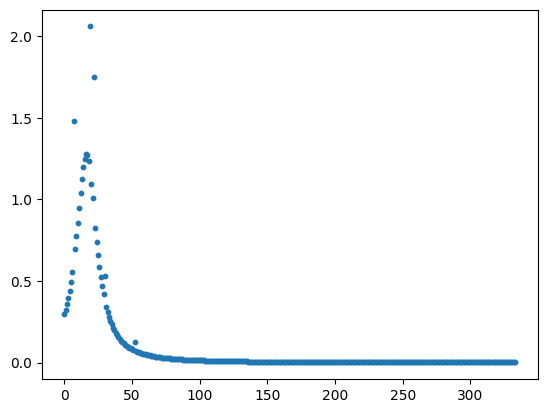

In [7]:
plt.scatter(range(len(error_list_DY)-1), error_list_DY[1:], s=10)
plt.show()

# ADMM

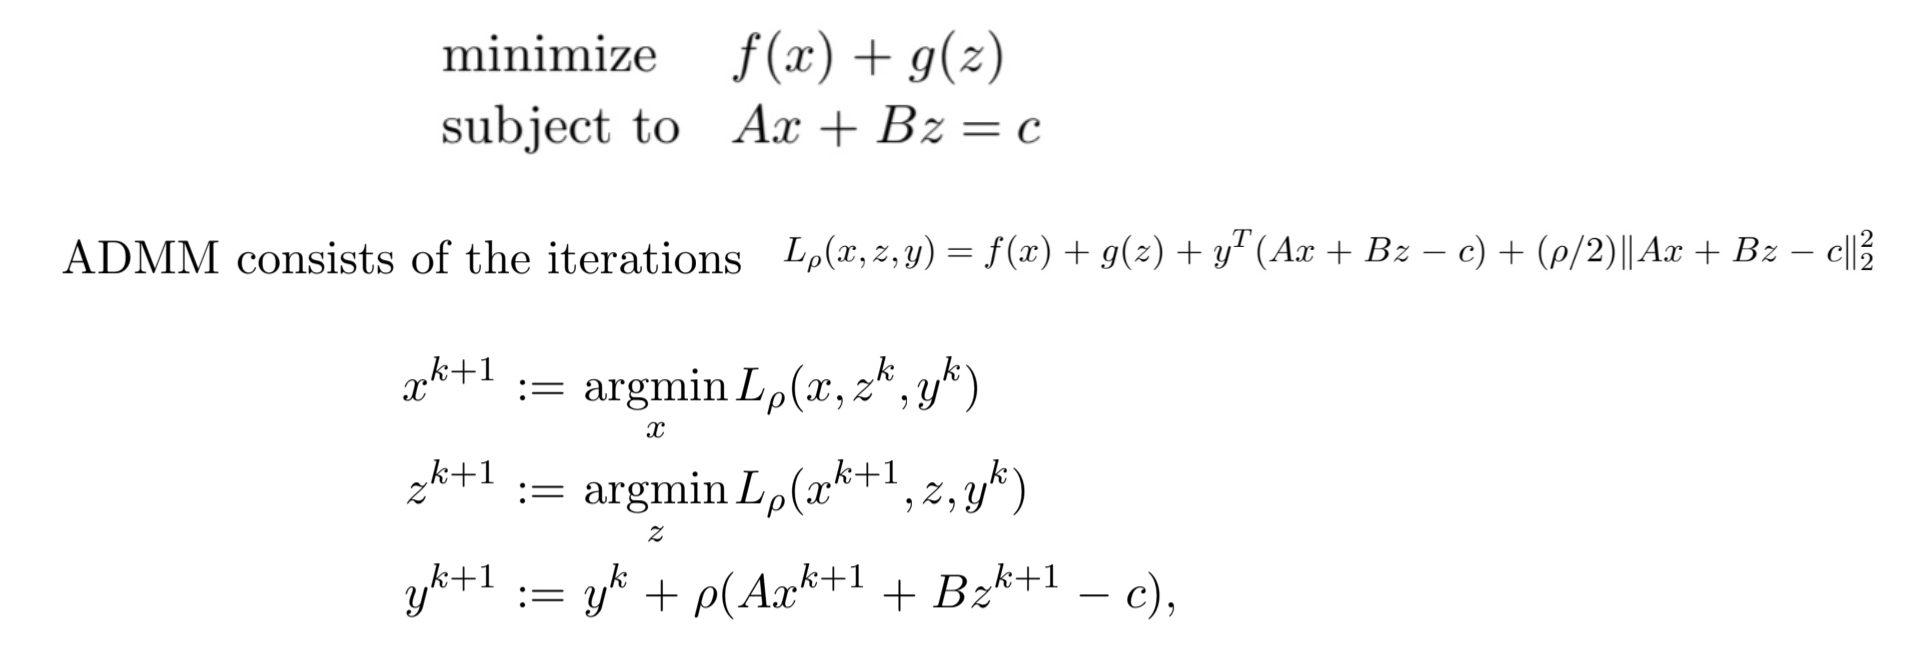

Ahora, estro objetivo será implementar el algoritmo ADMM, esto es:

In [43]:
def inversa_matriz_x2(a, N):
    return ((a**2+(N-2)*a-(N-1))**-1)*((a+N-2+1)*np.identity(N)-np.ones(N))

In [48]:
def ADMM_iteration(decision, state, dual, phi_z1, phi_z2, phi_z3, P, s=1e-3,t=1e-3,r=1e-3):
    """
        Input:
            - decision = (x1,x2,x3): (np.array(NxM), np.array(NxM), np.array(Mx1) decision variable
            - state    = (z1, z2): (np.array(Mx1), np.array(NxM)) state variables
            - dual     = (lambda_1, lambda_2, lambda_3) (np.array(NxM), np.array(NxM), np.array(Mx1)) dual update variable
            
              Now will go the gradient of the objective functions, in this case we
              will assume there are linear, so their value is fix and a vector.
              
            - phi_z1: np.array(N) function has contain the gradient of the cost function over z1 variable 
            - phi_z2: np.array(NxM) function has contain the gradient of the cost function over z2 variable
            - phi_z3: np.array(M) function has contain the gradient of the cost function over zm3 variable
            
            - prob: np.array(M) np.array that contain the probability of each scenario
            
            - s,t,r: floats that are the augmented term of lagrangian. 1e-3 by default.
        Output:
            - tuple np.array, np.array, np.array
        Work:
            The function compute one iteration over the Davis_Yin_algorithm
            with prior knowledge of gamma.
    """
    x1, x2, x3                   = decision
    z1, z2                       = state       #Unpackage the variables
    lambda_1, lambda_2, lambda_3 = dual
    
    N, M = x1.shape
    
    scale_factor_1 = (s+t) ** -1
    scale_factor_2 = np.einsum('i,ijk -> ijk', P/r, np.apply_along_axis(lambda x: inversa_matriz_x2(x, N), 1, (1-P*t/r)[:, None]))
    scale_factor_3 = P/r

    diff_1 = -0.5*(x1 - x2) + z2 - lambda_3
    diff_2 =  0.5*(x2.sum(axis=0) - x3) - z1 + lambda_1
    
    # Start algorithm
    x1_k = scale_factor_1*( -np.tile(phi_z1, (1,M)) + s*(pro.P_N(x1, P) - lambda_2) + t*(x1 + diff_1))
    x2_k = np.squeeze(scale_factor_2@((- phi_z2 - (r/P)*np.tile(-x2.sum(axis=0) + diff_2, (N,1)) - t*(x2 - diff_1) ).T)[:,:,None]).T
    x3_k = scale_factor_3*(  phi_z3 + (r/P)*(x3 + diff_2))
    
    z1_k = np.maximum( 0.5*(x2_k.sum(axis=0) - x3_k) + lambda_1 ,0)
    z2_k = np.maximum( 0.5*(x1_k - x2_k)   + lambda_3 ,0)
    
    lambda_1_k = lambda_1 + 0.5*(x2_k.sum(axis=0) - x3_k) - z1_k
    lambda_2_k = lambda_2 + x1_k - pro.P_N(x1_k, P)
    lambda_3_k = lambda_3 - 0.5*(x2 - x1) - z2_k
    
    return (x1_k, x2_k, x3_k), (z1_k, z2_k), (lambda_1_k, lambda_2_k, lambda_3_k)

In [49]:
N, M = 3, 3

x1  = np.random.randint(0,10, size=(N, M))+0.0
x2  = np.random.randint(0,10, size=(N, M))+0.0
x3  = np.random.randint(0,10, size=(1, M))+5.0

proba  = np.random.rand(M)  
proba /= proba.sum()  

gradient_of_h = np.random.randint(0,10, size=(N, 1))+0.0,\
                np.random.randint(0,10, size=(N, M))+0.0,\
                np.random.randint(0,10, size=(1, M))+5.0
    
phi_1, phi_2, phi_3 = gradient_of_h


z1 = np.random.randint(0,10, size=(1, M))
z2 = np.random.randint(0,10, size=(N, M))

lambda_1 = np.random.randint(0,10, size=(1, M))
lambda_2 = np.random.randint(0,10, size=(N, M))
lambda_3 = np.random.randint(0,10, size=(N, M))


%timeit ADMM_iteration((x1, x2, x3), (z1, z2), (lambda_1, lambda_2, lambda_3), phi_1, phi_2, phi_3, proba)
ADMM_iteration((x1, x2, x3), (z1, z2), (lambda_1, lambda_2, lambda_3), phi_1, phi_2, phi_3, proba)

506 µs ± 136 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


((array([[ -496.10159843,  -498.10159843,  -495.85159843],
         [ -497.58771655,  -496.83771655,  -498.33771655],
         [-2499.2439315 , -2496.2439315 , -2495.9939315 ]]),
  array([[-5021.4115557 , -4360.82189597, -4094.40411688],
         [  -20.9115557 ,  -362.82189597,   896.09588312],
         [ 1985.0884443 ,  1644.67810403,  2901.09588312]]),
  array([[2199.38317397, 3908.9039582 ,  682.94333388]])),
 (array([[0., 0., 0.]]),
  array([[2267.65497864, 1932.36014877, 1799.27625923],
         [   0.        ,    0.        ,    0.        ],
         [   0.        ,    0.        ,    0.        ]])),
 (array([[-2623.30892054, -3493.93482305,  -483.07784227]]),
  array([[5.9570609 , 7.9570609 , 3.2070609 ],
         [7.69009803, 0.44009803, 5.94009803],
         [2.29376481, 8.29376481, 7.54376481]]),
  array([[-2.26315498e+03, -1.93586015e+03, -1.79727626e+03],
         [ 3.00000000e+00,  3.50000000e+00,  1.50000000e+00],
         [ 8.00000000e+00,  3.00000000e+00,  3.50000000e+00

In [50]:
def ADMM(initial_point, gradient, proba):
    
    x1, x2, x3 = initial_point
    
    phi_1, phi_2, phi_3 = gradient
    
    N, M = x2.shape

    z1 = np.zeros((1, M))
    z2 = np.zeros((N, M))

    lambda_1 = np.zeros((1, M))
    lambda_2 = np.zeros((N, M))
    lambda_3 = np.zeros((N, M))
    
    s=1e3
    t=1e3
    r=1e3
    
    k=0
    Loss = 1000
    
    a= "factible"
    b= "factible"
    
    error_list = []
    
    while Loss >= 1e-3 and k <1000:#(a == "factible" or b=="factible"):
        
        (x1_k, x2_k, x3_k), (z1_k, z2_k), (lambda_1_k, lambda_2_k, lambda_3_k) = ADMM_iteration((x1, x2, x3), (z1, z2), (lambda_1, lambda_2, lambda_3), phi_1, phi_2, phi_3, proba, s, t, r)
        
        Loss = LA.norm(x1_k - x1)**2 + LA.norm(x2_k - x2)**2 + LA.norm(x3_k - x3)**2
        Loss = Loss/(LA.norm(x1_k)**2 + LA.norm(x2_k)**2 + LA.norm(x3_k)**2)*100
        
        error_list.append(Loss)
        
        a= "infactible"
        b= "infactible"
        
        if (x2_k <= x1_k).all():
            a = "factible"
        if (x2_k.sum(axis=0) >= x3_k).all():
            b = "factible"

        print("Iteration:",k ," Loss:", Loss, "Factible:",a,b)
        
        x1, x2, x3 = x1_k, x2_k, x3_k
        z1, z2 = z1_k, z2_k
        lambda_1, lambda_2, lambda_3 = lambda_1_k, lambda_2_k, lambda_3_k
        
        k+=1
        
    return (x1, x2, x3), (z1, z2), (lambda_1, lambda_2, lambda_3), error_list

In [51]:
N, M = 3, 5

z1_0   = np.random.randint(0,10, size=(N, M))+0.0
z2_0   = np.random.randint(0,10, size=(N, M))+0.0
z3_0   = np.random.randint(0,10, size=(1, M))+0.0

proba  = np.random.rand(M)  
proba /= proba.sum()  

gradient_of_h = np.random.randint(0,10, size=(N, 1))+0.0,\
                np.random.randint(0,10, size=(N, M))+0.0,\
                np.random.randint(0,10, size=(1, M))+5.0


(x1, x2, x3), (z1, z2), (lambda_1, lambda_2, lambda_3), error_list_ADMM = ADMM((z1_0,z2_0,z3_0), gradient_of_h, proba)

Iteration: 0  Loss: 42.56268735264656 Factible: infactible infactible
Iteration: 1  Loss: 7.4556225610687585 Factible: infactible factible
Iteration: 2  Loss: 3.2143937494745685 Factible: infactible factible
Iteration: 3  Loss: 7.617911089253358 Factible: infactible factible
Iteration: 4  Loss: 3.1795484051349985 Factible: infactible factible
Iteration: 5  Loss: 4.352799986277405 Factible: infactible factible
Iteration: 6  Loss: 1.8813697036689017 Factible: infactible infactible
Iteration: 7  Loss: 2.629960197293126 Factible: infactible factible
Iteration: 8  Loss: 3.651117222956128 Factible: infactible factible
Iteration: 9  Loss: 1.0716531745200584 Factible: infactible factible
Iteration: 10  Loss: 3.491167794771105 Factible: infactible infactible
Iteration: 11  Loss: 2.9639567330015755 Factible: infactible infactible
Iteration: 12  Loss: 1.774694384788065 Factible: infactible factible
Iteration: 13  Loss: 4.654556142824111 Factible: infactible factible
Iteration: 14  Loss: 1.7689554

Iteration: 175  Loss: 124.83285716377243 Factible: infactible factible
Iteration: 176  Loss: 32.97716824064245 Factible: infactible infactible
Iteration: 177  Loss: 88.47305005422064 Factible: infactible factible
Iteration: 178  Loss: 84.23311719384148 Factible: infactible factible
Iteration: 179  Loss: 27.448688682094545 Factible: infactible infactible
Iteration: 180  Loss: 128.06025470744277 Factible: infactible factible
Iteration: 181  Loss: 31.99640128144946 Factible: infactible infactible
Iteration: 182  Loss: 96.48758103735085 Factible: infactible factible
Iteration: 183  Loss: 84.01411326897926 Factible: infactible factible
Iteration: 184  Loss: 28.71328263742917 Factible: infactible infactible
Iteration: 185  Loss: 130.47272182037594 Factible: infactible factible
Iteration: 186  Loss: 30.879278493570688 Factible: infactible infactible
Iteration: 187  Loss: 105.47721514058293 Factible: infactible factible
Iteration: 188  Loss: 83.26348954404604 Factible: infactible factible
Iter

Iteration: 308  Loss: 39.797202841755436 Factible: infactible factible
Iteration: 309  Loss: 186.42624322289836 Factible: infactible infactible
Iteration: 310  Loss: 97.55632152863627 Factible: infactible factible
Iteration: 311  Loss: 26.12686997068005 Factible: infactible factible
Iteration: 312  Loss: 248.81531865578555 Factible: infactible factible
Iteration: 313  Loss: 38.92734697706218 Factible: infactible factible
Iteration: 314  Loss: 196.8806786698607 Factible: infactible infactible
Iteration: 315  Loss: 95.33611896267668 Factible: infactible factible
Iteration: 316  Loss: 27.127934250633125 Factible: infactible factible
Iteration: 317  Loss: 245.37176330507248 Factible: infactible factible
Iteration: 318  Loss: 38.10841243668573 Factible: infactible factible
Iteration: 319  Loss: 207.32524977474807 Factible: infactible infactible
Iteration: 320  Loss: 93.1694389876461 Factible: infactible factible
Iteration: 321  Loss: 28.256526018280166 Factible: infactible factible
Iteratio

Iteration: 464  Loss: 285.5613329448615 Factible: infactible factible
Iteration: 465  Loss: 43.26639427817094 Factible: infactible factible
Iteration: 466  Loss: 153.4111372076789 Factible: infactible factible
Iteration: 467  Loss: 126.90824071633897 Factible: infactible factible
Iteration: 468  Loss: 24.93762032661071 Factible: infactible factible
Iteration: 469  Loss: 278.2820927530954 Factible: infactible factible
Iteration: 470  Loss: 41.8083170897628 Factible: infactible factible
Iteration: 471  Loss: 165.32518682933363 Factible: infactible factible
Iteration: 472  Loss: 122.27389260274634 Factible: infactible factible
Iteration: 473  Loss: 25.47164025914297 Factible: infactible factible
Iteration: 474  Loss: 271.582079445505 Factible: infactible factible
Iteration: 475  Loss: 40.49251153640546 Factible: infactible factible
Iteration: 476  Loss: 177.96092046035935 Factible: infactible factible
Iteration: 477  Loss: 117.71038852721433 Factible: infactible factible
Iteration: 478  L

Iteration: 642  Loss: 42.643440958269196 Factible: infactible factible
Iteration: 643  Loss: 170.92761872342436 Factible: infactible factible
Iteration: 644  Loss: 121.01276275574524 Factible: infactible factible
Iteration: 645  Loss: 25.304271182089494 Factible: infactible factible
Iteration: 646  Loss: 278.2619895982049 Factible: infactible factible
Iteration: 647  Loss: 41.419653633895976 Factible: infactible factible
Iteration: 648  Loss: 181.12223216992268 Factible: infactible factible
Iteration: 649  Loss: 117.17454701612422 Factible: infactible factible
Iteration: 650  Loss: 26.0055722068313 Factible: infactible factible
Iteration: 651  Loss: 272.0451765325766 Factible: infactible factible
Iteration: 652  Loss: 40.246724876378266 Factible: infactible factible
Iteration: 653  Loss: 191.5352713466688 Factible: infactible factible
Iteration: 654  Loss: 113.48986301301538 Factible: infactible factible
Iteration: 655  Loss: 26.84953440128522 Factible: infactible factible
Iteration: 6

Iteration: 800  Loss: 136.2029256992773 Factible: infactible factible
Iteration: 801  Loss: 136.58435742404583 Factible: infactible factible
Iteration: 802  Loss: 23.944974047725886 Factible: infactible factible
Iteration: 803  Loss: 303.56165832803566 Factible: infactible factible
Iteration: 804  Loss: 46.23867132121718 Factible: infactible factible
Iteration: 805  Loss: 145.17577103559347 Factible: infactible factible
Iteration: 806  Loss: 132.21605413244478 Factible: infactible factible
Iteration: 807  Loss: 24.133046432607614 Factible: infactible factible
Iteration: 808  Loss: 296.4581491914273 Factible: infactible factible
Iteration: 809  Loss: 44.8594001891947 Factible: infactible factible
Iteration: 810  Loss: 154.55361448505988 Factible: infactible factible
Iteration: 811  Loss: 127.96555323596999 Factible: infactible factible
Iteration: 812  Loss: 24.456948454886195 Factible: infactible factible
Iteration: 813  Loss: 289.5974372506897 Factible: infactible factible
Iteration: 8

Iteration: 959  Loss: 24.312544836003294 Factible: infactible factible
Iteration: 960  Loss: 331.73842121994335 Factible: infactible factible
Iteration: 961  Loss: 51.87164385637848 Factible: infactible factible
Iteration: 962  Loss: 114.65529741141145 Factible: infactible factible
Iteration: 963  Loss: 148.523470613901 Factible: infactible factible
Iteration: 964  Loss: 24.066346957793797 Factible: infactible factible
Iteration: 965  Loss: 323.80195438285 Factible: infactible factible
Iteration: 966  Loss: 50.24113098183 Factible: infactible factible
Iteration: 967  Loss: 122.3182800885844 Factible: infactible factible
Iteration: 968  Loss: 144.04222068103553 Factible: infactible factible
Iteration: 969  Loss: 23.92342362502334 Factible: infactible factible
Iteration: 970  Loss: 316.0520607318507 Factible: infactible factible
Iteration: 971  Loss: 48.68572979121643 Factible: infactible factible
Iteration: 972  Loss: 130.5011796103496 Factible: infactible factible
Iteration: 973  Loss:

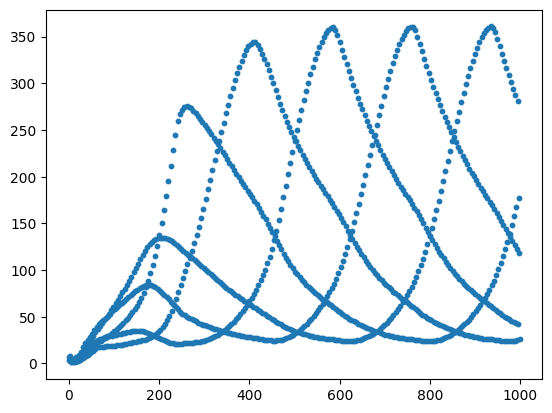

In [52]:
plt.scatter(range(len(error_list_ADMM)-1), error_list_ADMM[1:], s=10)
plt.show()

# Briceno_Arias

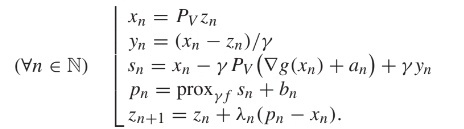

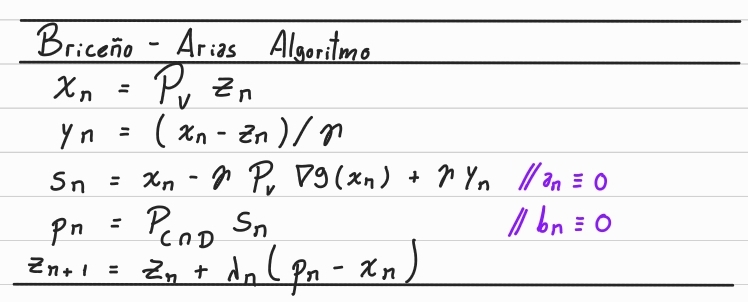

In [49]:
def Briceno_Arias_iteration(z1, z2, z2_copy, z3, gradient_of_g, P, gamma, lambdan):
    """
        Input:
            - z1: np.array(1xN)   decision variable
            - z2: np.array(NxM) decision variable
            - z3: np.array(Mx1)   decision variable
            - gradient_of_g: function has contain the gradien of the cost function
            - lambda_k: number between 0 and (4*beta - gamma)/(2*beta) where beta is 
                        the lipschitz constan of the gradien of h.
        Output:
            - tuple np.array, np.array, np.array
        Work:
            The function ompute one iteration over the Davis_Yin_algorithm
            with prior knowledge of gamma.
    """
    # Unpackage of gradient
    g1, g2, g3 = gradient_of_g
    
    # First step, xn = Pv zn
    x1, x2, x2_copy = pro.P_N1(z1, z2, z2_copy, P)
    x3 = z3
    
    # Segundo step, yn = (xn-zn)/gamma
    y1, y2, y2_copy, y3 = (x1-z1)/gamma, (x2-z2)/gamma, (x2_copy-z2_copy)/gamma, (x3-z3)/gamma
    
    # Third step, sn = xn - gamma * Pv ( gradient_of_g ) + gamma * yn
    s1_aux, s2_aux, s2_copy_aux = pro.P_N1(np.tile(g1,(1,M)), g2, g2, P)
    s1, s2, s2_copy, s3 = x1 - gamma*(s1_aux + y1), \
                          x2 - gamma*(s2_aux + y2), \
                          x2_copy - gamma*(s2_copy_aux + y2_copy), \
                          x3 - gamma*(g3 + y3)
    
    # Fourth step, pn = Pc\cap D sn
    (p1, p2),( p2_copy, p3) = pro.P_CinterD(s1, s2, s2_copy, s3)
    
    # Last step, zn+1 = zn + lambdan* (pn - xn)
    z1n, z2n, z2_copyn, z3n = z1 + lambdan * (p1 - x1), \
                              z2 + lambdan * (p2 - x2), \
                              z2_copy + lambdan * (p2_copy - x2_copy), \
                              z3 + lambdan * (p3 - x3), \
    
    return (x1, x2, x2_copy, x3), (y1, y2, y2_copy, y3), (z1n, z2n, z2_copyn, z3n)

In [50]:
N, M = 4, 5

z1_0   = np.random.randint(0,10, size=(N, M))+0.0
z2_0   = np.random.randint(0,10, size=(N, M))+0.0
z2_copy_0   = np.random.randint(0,10, size=(N, M))+0.0
z3_0   = np.random.randint(0,10, size=(1, M))+5.0

gradient_of_g = np.random.randint(0,10, size=(N, 1))+0.0,\
                np.random.randint(0,10, size=(N, M))+0.0,\
                np.random.randint(0,10, size=(1, M))+5.0


proba  = np.random.rand(M)  
proba /= proba.sum()  

%timeit Briceno_Arias_iteration(z1_0,z2_0,z2_copy_0, z3_0, gradient_of_g, proba, 1e-3, 1e-3)
Briceno_Arias_iteration(z1_0,z2_0,z2_copy_0, z3_0, gradient_of_g, proba, 1e-3, 1e-3)

453 µs ± 51.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


((array([[4.63787851, 4.63787851, 4.63787851, 4.63787851, 4.63787851],
         [6.61716921, 6.61716921, 6.61716921, 6.61716921, 6.61716921],
         [3.13550562, 3.13550562, 3.13550562, 3.13550562, 3.13550562],
         [6.24256968, 6.24256968, 6.24256968, 6.24256968, 6.24256968]]),
  array([[1.5, 3.5, 5.5, 5. , 2.5],
         [5.5, 4. , 5. , 4. , 5. ],
         [5.5, 3.5, 4.5, 5. , 3.5],
         [7. , 5.5, 6.5, 3. , 3.5]]),
  array([[1.5, 3.5, 5.5, 5. , 2.5],
         [5.5, 4. , 5. , 4. , 5. ],
         [5.5, 3.5, 4.5, 5. , 3.5],
         [7. , 5.5, 6.5, 3. , 3.5]]),
  array([[8., 7., 7., 7., 6.]])),
 (array([[ -362.12148759,   637.87851241,   637.87851241, -1362.12148759,
            637.87851241],
         [-2382.83079467,  1617.16920533,  2617.16920533, -2382.83079467,
           2617.16920533],
         [ 2135.50561969,  -864.49438031,  3135.50561969, -4864.49438031,
          -2864.49438031],
         [-2757.4303218 ,  2242.5696782 ,  4242.5696782 ,   242.5696782 ,
          -

In [57]:
def Briceno_Arias(initial_point, gradient_of_g, P, gamma=1e-3, lambdan=1e-3):

    z1, z2, z2_copy, z3 = initial_point
    
    N, M = z2.shape

    k=0
    Loss = 1000
    
    # Briceno_Arias_iteration(z1, z2, z2_copy, z3, gradient_of_g, P, gamma, lambdan):
    # (x1, x2, x2_copy, x3), (y1, y2, y2_copy, y3), (s1, s2, s2_copy, s3), (p1, p2, p2_copy, p3), (z1n, z2n, z2_copyn, z3n)
    
    x1, x2, x2_copy, x3 = np.zeros((N,M)), np.zeros((N,M)), np.zeros((N,M)), np.zeros((1,M))
    y1, y2, y2_copy, y3 = np.zeros((N,M)), np.zeros((N,M)), np.zeros((N,M)), np.zeros((1,M))
    
    error_list = []
    
    while Loss >= 1e-3 and k < 500:
        
        (x1_k, x2_k, x2_copy_k, x3_k), (y1_k, y2_k, y2_copy_k, y3_k), (z1n_k, z2n_k, z2_copyn_k, z3n_k) = Briceno_Arias_iteration(z1, z2, z2_copy, z3, gradient_of_g, P, gamma, lambdan)
        
        Loss = LA.norm(x1_k - x1)**2 + LA.norm(x2_k - x2)**2 + LA.norm(x3_k - x3)**2
        Loss = Loss/(LA.norm(x1_k)**2 + LA.norm(x2_k)**2 + LA.norm(x3_k)**2)*100
        
        a= "infactible"
        b= "infactible"
        
        error_list.append(Loss)
        
        if (x2_k <= x1_k).all():
            a = "factible"
        if (x2_copy_k.sum(axis=0) >= x3_k).all():
            b = "factible"

        print("Iteration:",k ," Loss:", Loss, "Factible:",a,b)
        
        x1, x2, x2_copy, x3 = x1_k, x2_k, x2_copy_k, x3_k
        y1, y2, y2_copy, y3 = y1_k, y2_k, y2_copy_k, y3_k
        
        k+=1
        
    return (x1, x2, x2_copy, x3), (y1, y2, y2_copy, y3), error_list

In [58]:
N, M = 3, 5

z1_0   = np.random.randint(0,10, size=(N, M))+0.0
z2_0   = np.random.randint(0,10, size=(N, M))+0.0
z2_copy_0   = np.random.randint(0,10, size=(N, M))+0.0
z3_0   = np.random.randint(0,10, size=(1, M))+5.0

initial_point = (z1_0, z2_0, z2_copy_0, z3_0)

gradient_of_g = np.random.randint(0,10, size=(N, 1))+0.0,\
                np.random.randint(0,10, size=(N, M))+0.0,\
                np.random.randint(0,10, size=(1, M))+5.0


proba  = np.random.rand(M)  
proba /= proba.sum()  

#%timeit Briceno_Arias_iteration(z1_0,z2_0,z2_copy_0, z3_0, gradient_of_g, proba, 1e-3, 1e-3)
(x1, x2, x2_copy, x3), (y1, y2, y2_copy, y3), error_list_BA = Briceno_Arias(initial_point, gradient_of_g, proba)

Iteration: 0  Loss: 100.0 Factible: infactible infactible
Iteration: 1  Loss: 0.0 Factible: infactible infactible


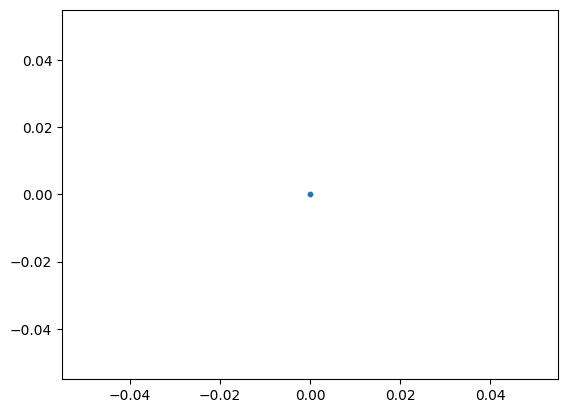

In [59]:
plt.scatter(range(len(error_list_BA)-1), error_list_BA[1:], s=10)
plt.show()